In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/CV_projects/Object_detection/archive.zip -d /content/data

In [ ]:
import os
from google.colab.patches import cv2_imshow
import cv2
import matplotlib.pyplot as plt
import random

In [ ]:
train_path = '/content/data/vehicle dataset/train'
valid_path = '/content/data/vehicle dataset/valid'
classes_path = '/content/data/vehicle dataset/classes.txt'

In [ ]:
with open(classes_path) as f:
    classes = f.read()
print(classes.split())

['car', 'threewheel', 'bus', 'truck', 'motorbike', 'van']


In [ ]:
def draw_rectangle(img_path,label_path,classes_path=classes_path):
  # get class names
  with open(classes_path) as f:
    classes = f.read()
  classes = classes.split()

  # read image
  img = cv2.imread(img_path)
  #img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  height,width,channels = img.shape
  #print(f'Heigh: {height} Width: {width}')
  #cv2_imshow(img)

  # read labels
  with open(label_path) as f:
    label = f.read()
  labels = [x for x in label.split('\n') if x!='']
  for l in labels:
    label = list(map(float,l.split(' ')))

    # extract end points of rectangle
    c,x,y,w,h = list(label)
    img_h, img_w, _ = img.shape
    x_min = int((x - w/2) * img_w)
    y_min = int((y - h/2) * img_h)
    x_max = int((x + w/2) * img_w)
    y_max = int((y + h/2) * img_h)

    # Draw the rectangle on the image
    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), (0, 0, 255), 2)
    cv2.putText(img, classes[int(c)], (x_min, y_min - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)
  #cv2_imshow(img)
  return img


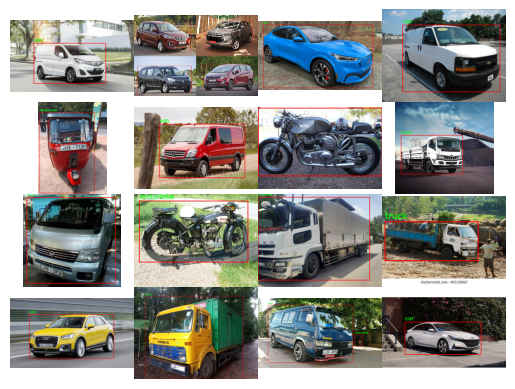

In [ ]:
for i in range(1, 17):
    plt.subplot(4, 4, i)
    # pick random img
    choice = os.listdir(train_path+'/images')[random.randint(0,2100)]
    img_path = train_path+'/images/'+choice
    label_path = train_path+'/labels/'+choice.split('.')[0]+'.txt'
    # plot
    img = draw_rectangle(img_path,label_path,classes_path=classes_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.axis('off')
    plt.imshow(img)

plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

**Training Custom Model**

In [ ]:
!pip install -q ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 591.4/591.4 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 206.5/206.5 kB 24.3 MB/s eta 0:00:00


CLI commands

In [ ]:
#!yolo predict model=yolov8n.pt source='/content/data/vehicle dataset/valid/images/03137_Nissan NV Passenger Van 2012.jpg'

Ultralytics YOLOv8.0.109 🚀 Python-3.10.11 torch-2.0.1+cu118 CPU
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs

image 1/1 /content/data/vehicle dataset/valid/images/03137_Nissan NV Passenger Van 2012.jpg: 384x640 1 bus, 2 trucks, 152.7ms
Speed: 11.3ms preprocess, 152.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict2


Custom Training

In [ ]:
from ultralytics import YOLO

# Load a model
#model = YOLO()  # build a new model from scratch
model = YOLO("yolov8n.pt")  # load a pretrained model (recommended for training)

100%|██████████| 6.23M/6.23M [00:00<00:00, 83.1MB/s]


In [ ]:
print(model.model)

DetectionModel(
  (model): Sequential(
    (0): Conv(
      (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
      (act): SiLU(inplace=True)
    )
    (1): Conv(
      (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
      (act): SiLU(inplace=True)
    )
    (2): C2f(
      (cv1): Conv(
        (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (cv2): Conv(
        (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
    

Create data.yaml file
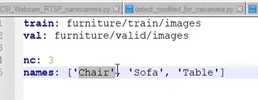

data.yaml file

```
train: /content/data/vehicle dataset/train/images
val:/content/data/vehicle dataset/valid/images

nc: 6
names: ['car', 'threewheel', 'bus', 'truck', 'motorbike', 'van']
```



In [ ]:
# Use the model
model.train(data="/content/data/vehicle dataset/data.yaml", epochs=3)  # train the model

Ultralytics YOLOv8.0.109 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/data/vehicle dataset/data.yaml, epochs=3, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=

In [ ]:
model.val()  # no arguments needed, dataset and settings remembered

Ultralytics YOLOv8.0.109 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006818 parameters, 0 gradients
val: Scanning /content/data/vehicle dataset/valid/labels.cache... 900 images, 0 backgrounds, 0 corrupt: 100%|██████████| 900/900 [00:00<?, ?it/s]
val: WARNING ⚠️ /content/data/vehicle dataset/valid/images/car55.jpg: corrupt JPEG restored and saved
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 57/57 [00:20<00:00,  2.73it/s]
                   all        900       1150       0.91      0.833      0.924      0.799
                   car        900        201      0.904      0.881      0.925      0.877
            threewheel        900        227      0.935      0.815      0.907       0.78
                   bus        900        185          1      0.884      0.985      0.892
                 truck        900        151      0.796      0.901       0.92      0.765
             m

ultralytics.yolo.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5])
box: ultralytics.yolo.utils.metrics.Metric object
confusion_matrix: <ultralytics.yolo.utils.metrics.ConfusionMatrix object at 0x7f07de944e50>
fitness: 0.8114640298340298
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
maps: array([    0.87668,     0.77976,     0.89237,     0.76499,     0.65616,     0.82399])
names: {0: 'car', 1: 'threewheel', 2: 'bus', 3: 'truck', 4: 'motorbike', 5: 'van'}
plot: True
results_dict: {'metrics/precision(B)': 0.9104237291406604, 'metrics/recall(B)': 0.8330206171126279, 'metrics/mAP50(B)': 0.9237047046990222, 'metrics/mAP50-95(B)': 0.7989928437379195, 'fitness': 0.8114640298340298}
save_dir: PosixPath('runs/detect/val')
speed: {'preprocess': 0.567683113945855, 'inference': 6.1495878961351185, 'loss': 0.0011693106757269965, 'postprocess': 2.826547887590196}

In [ ]:
source = '/content/data/vehicle dataset/valid/images/00790.jpg'
model.predict(source, save=True, conf=0.5)

In [ ]:
# move runs to gdrive
import shutil
drive_folder_path = '/content/drive/MyDrive/CV_projects/Object_detection'

shutil.move('/content/runs', drive_folder_path)

'/content/drive/MyDrive/CV_projects/Object_detection/runs'

In [ ]:
# export model
model.export(format='onnx')

Ultralytics YOLOv8.0.109 🚀 Python-3.10.11 torch-2.0.1+cu118 CPU

PyTorch: starting from runs/detect/train/weights/best.pt with input shape (16, 3, 640, 640) BCHW and output shape(s) (16, 10, 8400) (5.9 MB)
requirements: Ultralytics requirement "onnx>=1.12.0" not found, attempting AutoUpdate...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 241.9 MB/s eta 0:00:00

requirements: 1 package updated per ['onnx>=1.12.0']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.14.0 opset 17...
ONNX: export success ✅ 12.6s, saved as runs/detect/train/weights/best.onnx (11.7 MB)

Export complete (23.0s)
Results saved to /content/runs/detect/train/weights
Predict:         yolo predict task=detect model=runs/detect/train/weights/best.onnx imgsz=640 
Validate:        yolo val task=detect model=runs/detect/train/weights/best.onnx imgs

============= Diagnostic Run torch.onnx.export version 2.0.1+cu118 =============
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================



'runs/detect/train/weights/best.onnx'

In [ ]:
imported = YOLO('/content/runs/detect/train/weights/best.pt')

In [ ]:
imported.predict('/content/bus.jpg', save=True, conf=0.5)


image 1/1 /content/bus.jpg: 640x480 1 threewheel, 8.1ms
Speed: 4.1ms preprocess, 8.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict3


[ultralytics.yolo.engine.results.Results object with attributes:
 
 boxes: ultralytics.yolo.engine.results.Boxes object
 keypoints: None
 keys: ['boxes']
 masks: None
 names: {0: 'car', 1: 'threewheel', 2: 'bus', 3: 'truck', 4: 'motorbike', 5: 'van'}
 orig_img: array([[[122, 148, 172],
         [120, 146, 170],
         [125, 153, 177],
         ...,
         [157, 170, 184],
         [158, 171, 185],
         [158, 171, 185]],
 
        [[127, 153, 177],
         [124, 150, 174],
         [127, 155, 179],
         ...,
         [158, 171, 185],
         [159, 172, 186],
         [159, 172, 186]],
 
        [[128, 154, 178],
         [126, 152, 176],
         [126, 154, 178],
         ...,
         [158, 171, 185],
         [158, 171, 185],
         [158, 171, 185]],
 
        ...,
 
        [[185, 185, 191],
         [182, 182, 188],
         [179, 179, 185],
         ...,
         [114, 107, 112],
         [115, 105, 111],
         [116, 106, 112]],
 
        [[157, 157, 163],
      